# TP Semanal 7

# Herramientas de simulación

In [1]:
# Modulos que voy a usar durante la TS7
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt

In [2]:
#Funcion para plotear modulo y fase de un filtro analógico

"""
Clase para plotear sistenmas analógicos
Recibe como argumento el numerador y denominador de la transferencia
Tiene metodos para plotear:
-Respuesta en modulo
-Respuesta en fase
"""
class SysS():
    """
    Constructor, calcula todos los paramtros del sistema
    """
    def __init__(self, num, den, omega_range=None, num_points=1000):
        # Si no se proporciona un rango de frecuencias, calculamos uno automáticamente
        if omega_range is None:
            self.omega_range = np.logspace(-1, 2, num_points)  # De 0.1 a 100 rad/s en escala logarítmica
        else:
            self.omega_range = omega_range
        # Calculamos la respuesta en frecuencia H(jω)
        omega = 1j * omega_range
        H = np.polyval(num, omega) / np.polyval(den, omega)

        # Calculamos el módulo y la fase de H(jω)
        self.magnitude = np.abs(H)
        self.phase = np.angle(H, deg=True)  # Convertimos la fase a grados

    def printModule(self):
        # Graficamos el módulo en una figura
        plt.figure(1,figsize=(12, 4))
        plt.semilogx(self.omega_range, 20 * np.log10(self.magnitude))
        plt.title('Diagrama de Bode - Módulo')
        plt.xlabel('Frecuencia (rad/s)')
        plt.ylabel('Magnitud (dB)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
    def printPhase(self):
        # Graficamos la fase en otra figura
        plt.figure(2, figsize=(12, 4))
        plt.semilogx(self.omega_range, self.phase)
        plt.title('Diagrama de Bode - Fase')
        plt.xlabel('Frecuencia (rad/s)')
        plt.ylabel('Fase (grados)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [3]:
"""
Clase para plotear sistenmas digitales
Recibe como argumento el numerador y denominador de la transferencia
Tiene metodos para plotear:
-Diagrama de polos y ceros
-Respuesta en modulo
-Respuesta en fase
-Retardo de grupo
"""
class SysZ():
    """
    Constructor, calcula todos los paramtros del sistema
    """
    def __init__(self, numz, denz, fs, N):
        #Guardo fs y N
        self.fs=fs
        self.N=N

        #Calculo polos y ceros
        system = sig.TransferFunction(numz, denz, dt=1/fs)
        self.poles = system.poles
        self.zeros = system.zeros

        # Calculo la respuesta de frecuencia en el dominio Z
        self.w, self.h = sig.freqz(numz, denz, fs=fs, worN=N)

        # Calculo la magnitud, fase y retardo de grupo
        self.mag = np.abs(self.h)

        self.phase = np.angle(self.h)

        ejeMuestras = self.w * (2*np.pi/self.fs)
        self.group_delay = -np.diff(self.phase) / np.diff(ejeMuestras)

    """
    Plotea diagrama de polos y ceros
    verbose: imprime los polos y ceros (opcion por default true)
    xlim: limites en x, se pasa en forma de tupla (por default -2,2)
    ylim: limites en y, se pasa en forma de tupla (por default -2,2)
    """
    def printPZMap(self, verbose=True, xlim=None, ylim=None):
        # Contar la multiplicidad de los polos y ceros
        unique_poles = np.unique(self.poles)
        unique_zeros = np.unique(self.zeros)
        pole_multiplicity = [np.count_nonzero(self.poles == p) for p in unique_poles]
        zero_multiplicity = [np.count_nonzero(self.zeros == z) for z in unique_zeros]

        # Crear una gráfica para el diagrama de polos y ceros
        plt.figure(figsize=(8, 8))
        plt.scatter(np.real(self.poles), np.imag(self.poles), marker='x', label='Polos', color='red')
        plt.scatter(np.real(self.zeros), np.imag(self.zeros), marker='o', label='Ceros', color='blue')

        # Dibujar el círculo de radio unitario en línea punteada
        circle = plt.Circle((0, 0), 1, fill=False, linestyle='--', color='green', label='Círculo Unitario')
        plt.gca().add_patch(circle)

        # Etiquetar los polos con multiplicidad mayor a 1
        for i, (pole, multiplicity) in enumerate(zip(unique_poles, pole_multiplicity)):
            if multiplicity > 1:
                plt.annotate(f'{multiplicity}', (np.real(pole)+.03, np.imag(pole)+.03), fontsize=10, color='red')

        # Etiquetar los ceros con multiplicidad mayor a 1
        for i, (zero, multiplicity) in enumerate(zip(unique_zeros, zero_multiplicity)):
            if multiplicity > 1:
                plt.annotate(f'{multiplicity}', (np.real(zero)+.03, np.imag(zero)+.03), fontsize=10, color='blue')

        plt.title('Diagrama de Polos y Ceros')
        plt.xlabel('Parte Real')
        plt.ylabel('Parte Imaginaria')
        plt.axhline(0, color='black', linestyle='--')  # Línea horizontal para el eje real
        plt.axvline(0, color='black', linestyle='--')  # Línea vertical para el eje imaginario

        #Limites configurables
        if(xlim==None):
            xlim=(-2, 2)
        if(ylim==None):
            ylim=(-2, 2)
        plt.xlim(xlim[0],xlim[1])
        plt.ylim(ylim[0],ylim[1])

        #Plot
        plt.legend()
        plt.grid(True)
        plt.show()
        if(verbose):
            print("Polos:")
            print(self.poles)
            print("Zeros:")
            print(self.zeros)

    """
    Plotea respuesta en módulo
    ylim: limites en Y, se pasa en forma de tupla (opcional)
    """
    def printModule(self, ylim=None):
        plt.figure(figsize=(12, 4))
        plt.semilogx(self.w, 20 * np.log10(self.mag))
        plt.title('Respuesta de magnitud')
        plt.xlabel('Frecuencia discreta [Hz]')
        plt.ylabel('Magnitud [dB]')
        if(ylim!=None):
            plt.ylim(ylim[0],ylim[1])
        plt.grid()
        plt.tight_layout()
        plt.show()

    """
    Plotea respuesta en fase
    ylim: limites en Y, se pasa en forma de tupla (opcional)
    """
    def printPhase(self, ylim=None):
        plt.figure(figsize=(12, 4))
        plt.semilogx(self.w, np.degrees(self.phase))
        plt.title('Respuesta de fase')
        plt.xlabel('Frecuencia discreta [Hz]')
        plt.ylabel('Fase [grados]')
        if(ylim==None):
            ylim=(-180,180)
        plt.ylim(ylim[0],ylim[1])
        plt.grid()
        plt.tight_layout()
        plt.show()

    """
    Plotea retardo de grupo
    ylim: limites en Y, se pasa en forma de tupla (opcional)
    """
    def printGroupDelay(self, ylim=None):
        plt.figure(figsize=(12, 4))
        plt.semilogx(self.w[:-1], self.group_delay)
        plt.title('Retardo de grupo')
        plt.xlabel('Frecuencia discreta [Hz]')
        plt.ylabel('Retardo de grupo [muestras]')
        if(ylim!=None):
            plt.ylim(ylim[0],ylim[1])
        plt.grid()
        plt.tight_layout()
        plt.show()

# Ejercicio 1

Se desea emular digitalmente la característica de un filtro analógico pasa bajos Butterworth de
orden 2, con 𝑓𝑐 = 1 𝑘𝐻𝑧

A. Para 𝑓𝑠 = 100 𝑘𝐻𝑧 y aplicando transformación bilineal, obtener un filtro con respuesta 𝐻(𝑧) cuyo comportamiento emule al Butterworth analógico.
Trazar la respuesta en frecuencia de módulo y fase de ambos filtros sobre un mismo gráfico para establecer comparaciones.

B. Repetir el punto anterior para 𝑓𝑠 = 10 𝑘𝐻𝑧

C. Repetir los puntos A) y B) si se desea emular digitalmente la característica de un filtro analógico pasa altos Butterworth de orden 2, con 𝑓𝑐 = 6 𝑘𝐻𝑧

D. Indique en cuál de los 3 casos ( A, B ó C ) justificaría rediseñar aplicando prewarping. Explique el motivo en pocas palabras.


### Diseño filtros Butter Pasa Bajos y Pasa altos Analógicos

#### Armo transferencia analógica:

- Para filtros pasa-bajos
wc=1kHz

Primero ws=100kHz

Luego cambio ws=10kHz

- Para filtros pasa-altos
wc=6kHz

Priemro ws=100kHz

Luego cambio ws=10kHz

Diseño filtro Butterworth, al ser maxima planicidad Q=1/sqrt(2):
- Filtro pasabajos pasa-bajos:
\begin{equation}
H(\$) = \cfrac{wc^{2}}{\$^{2}+wc\sqrt{2}+wc^{2}}
\end{equation}

- Filtro pasabajos pasa-altos:
\begin{equation}
H(\$) = \cfrac{\$^{2}}{\$^{2}+wc\sqrt{2}+wc^{2}}
\end{equation}

- Para pasar del dominio s al dominio z hay que aplicar la transformada bilineal

\begin{equation}
$ = k\cfrac{z-1}{z+1}
\end{equation}

\begin{equation}
k = 2 f_s
\end{equation}

### Simulo Filtro Pasa-Bajos Analógico

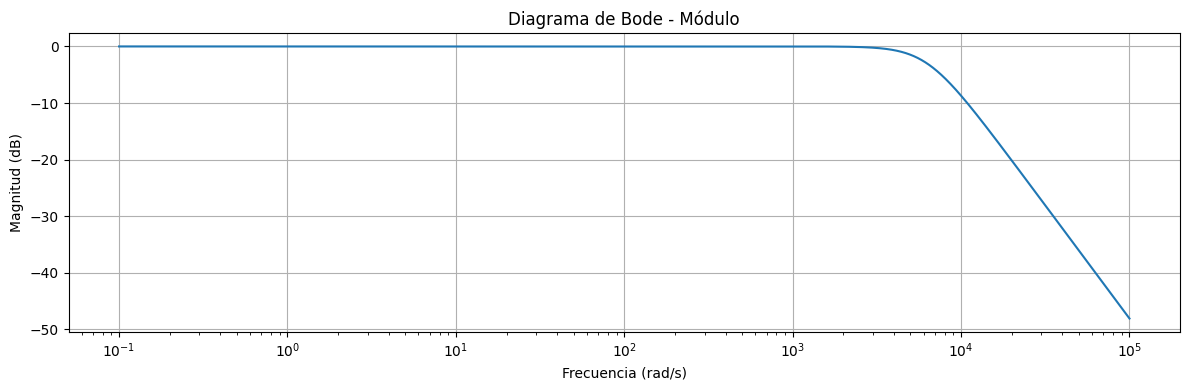

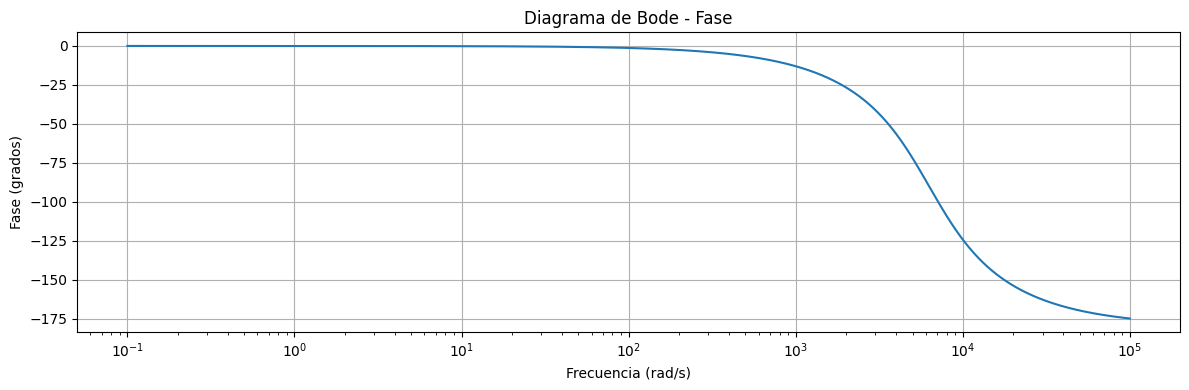

In [4]:
# Ploteo filtro pasa bajos analógico
fc=1000
w0=np.pi*2*fc
Q=1/np.sqrt(2)

num = [w0**2]
den = [1, w0/Q, w0**2]
pasaBajosAnalogico = SysS(num, den, np.logspace(-1, 5, 5000),5000)
pasaBajosAnalogico.printModule()
pasaBajosAnalogico.printPhase()


### Simulo Filtro Pasa-Bajos con fs=100 kHz y fc= 1kHz

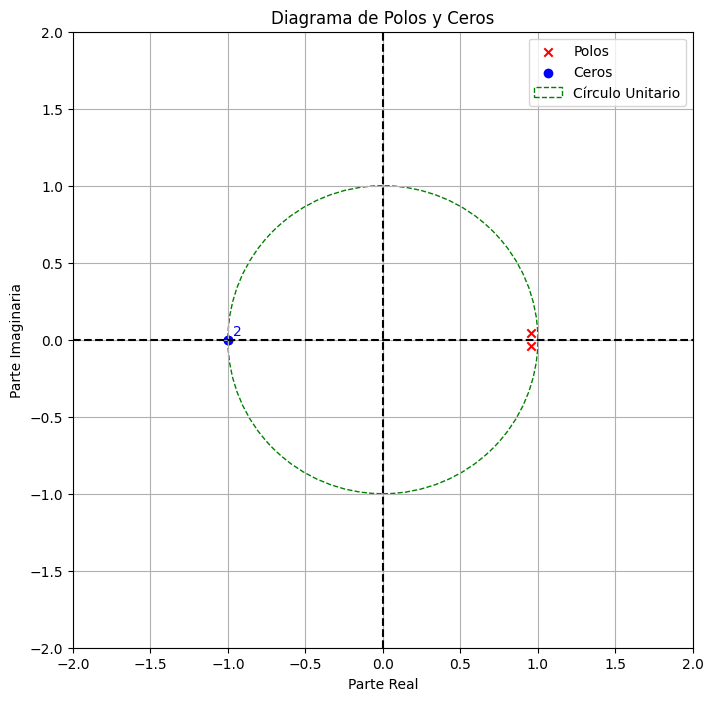

Polos:
[0.95561312+0.04249872j 0.95561312-0.04249872j]
Zeros:
[-1. -1.]


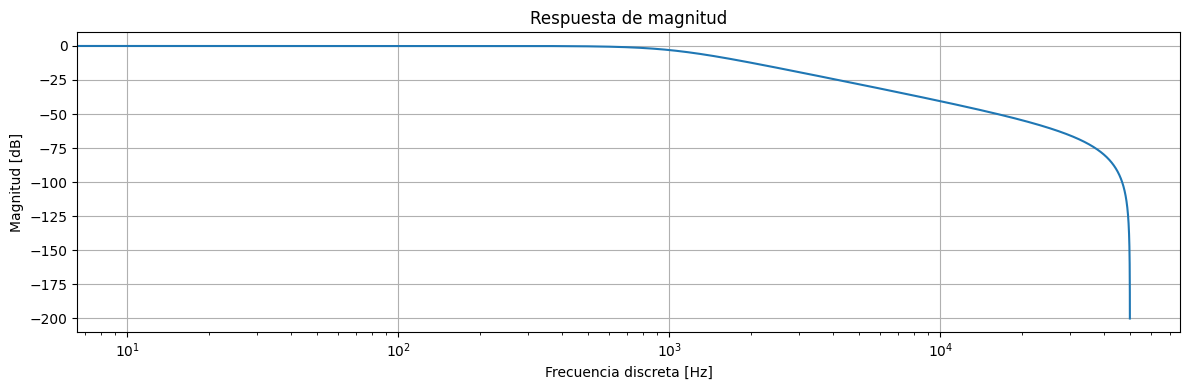

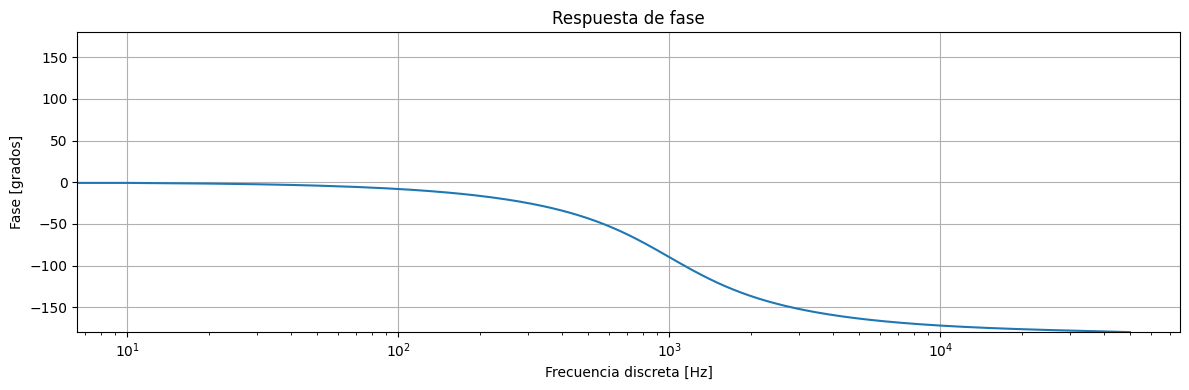

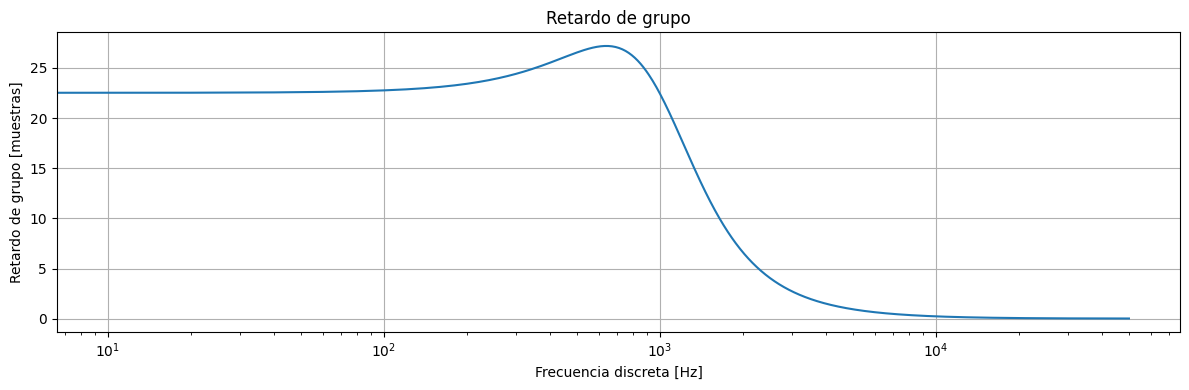

In [5]:
#Defino coeficientes
fs=100000
fc=1000
w0=np.pi*2*fc
k=2*fs

num = [w0**2]
den = [1,np.sqrt(2)*w0,w0**2]

num,den = sig.bilinear(num,den,fs)

sysPB_fs100 = SysZ(num,den,fs=fs,N=5000)

#Plot PZMap
sysPB_fs100.printPZMap()

#Plot Module
sysPB_fs100.printModule()

#Plot Phase
sysPB_fs100.printPhase()

#Plot Group Delay
sysPB_fs100.printGroupDelay()

### Simulo Filtro Pasa-Bajos con fs=10 kHz y fc=1 kHz

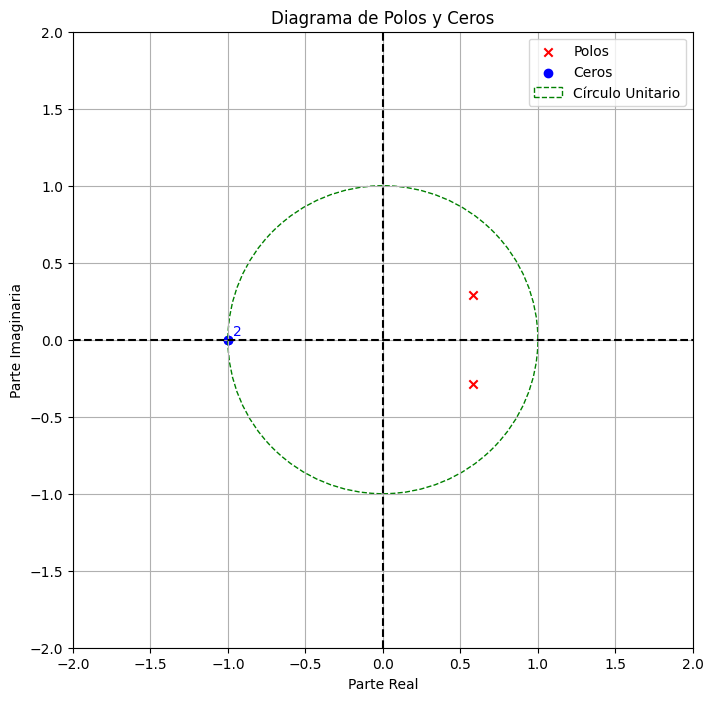

Polos:
[0.58413033+0.2879409j 0.58413033-0.2879409j]
Zeros:
[-1. -1.]


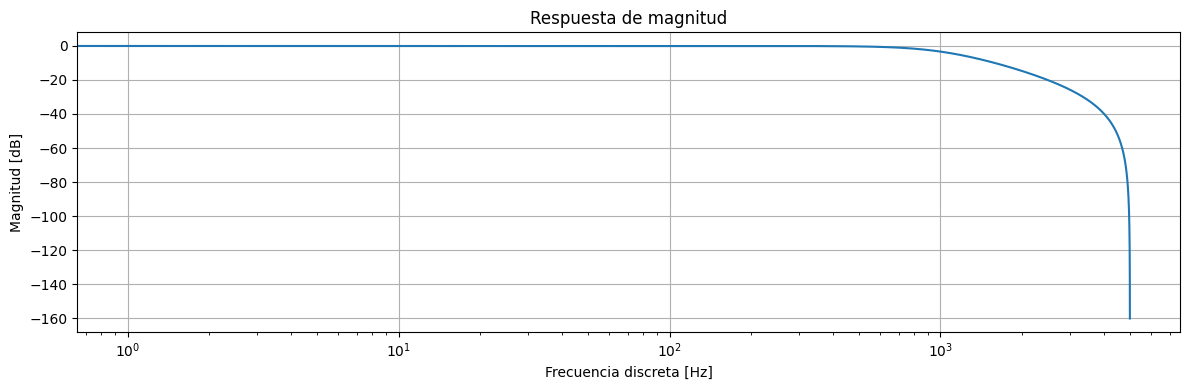

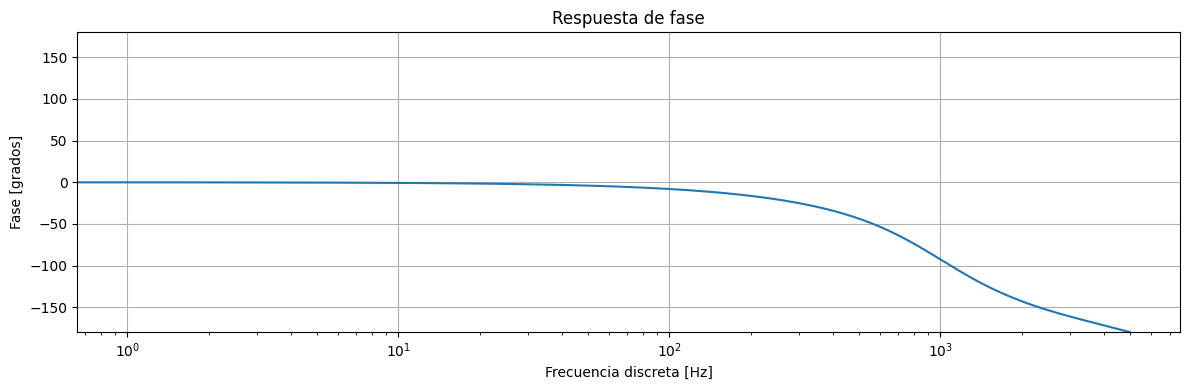

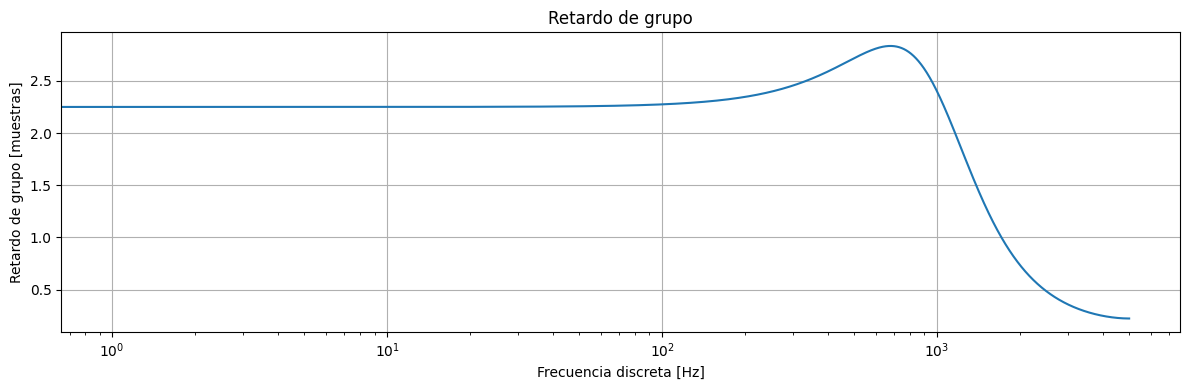

In [6]:
#Defino coeficientes
fs=10000
fc=1000
w0=np.pi*2*fc
k=2*fs

num = [w0**2]
den = [1,np.sqrt(2)*w0,w0**2]

num,den = sig.bilinear(num,den,fs)

sysPB_fs10 = SysZ(num,den,fs=fs,N=5000)

#Plot PZMap
sysPB_fs10.printPZMap()

#Plot Module
sysPB_fs10.printModule()

#Plot Phase
sysPB_fs10.printPhase()

#Plot Group Delay
sysPB_fs10.printGroupDelay()

### Simulo Filtro Pasa-Altos Analógico

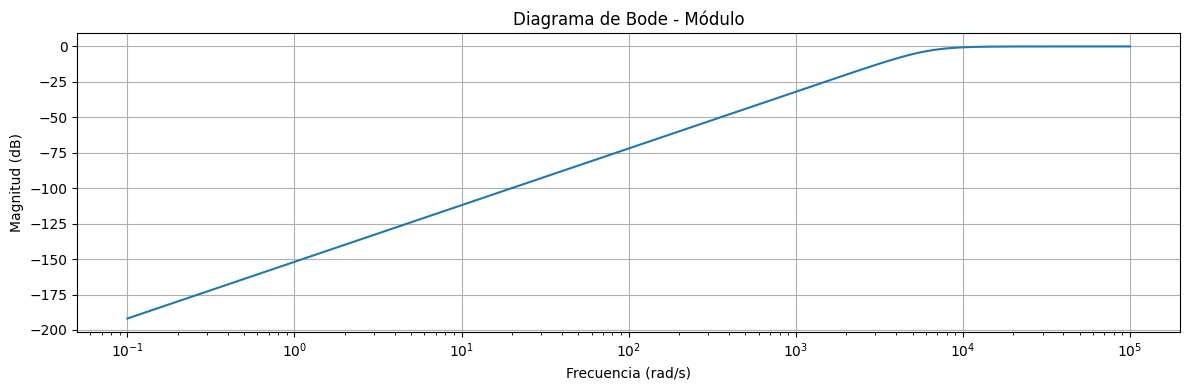

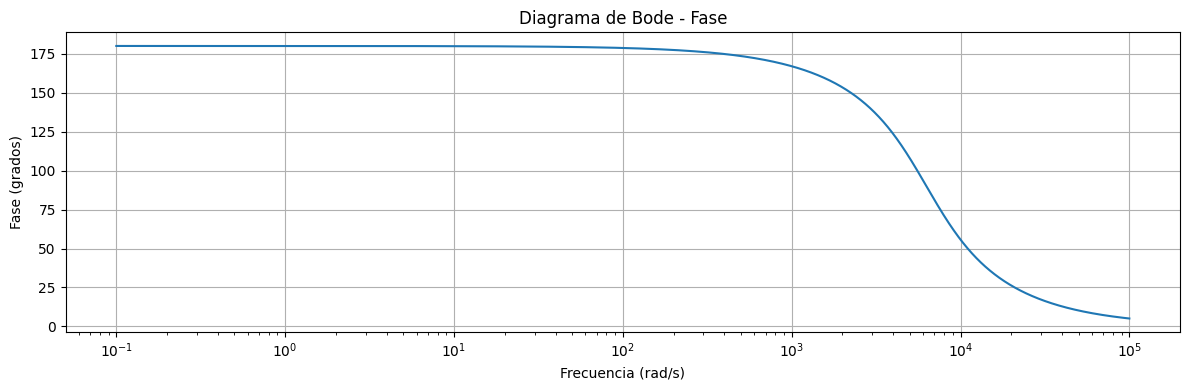

In [7]:
# Ploteo filtro pasa altos analógico
fc=1000
w0=np.pi*2*fc
Q=1/np.sqrt(2)

num = [1,0,0]
den = [1, w0/Q, w0**2]
pasaAltosAnalogico = SysS(num, den, np.logspace(-1, 5, 5000),5000)
pasaAltosAnalogico.printModule()
pasaAltosAnalogico.printPhase()

### Simulo Filtro Pasa-Altos con fs=100 kHz y fc=6 kHz

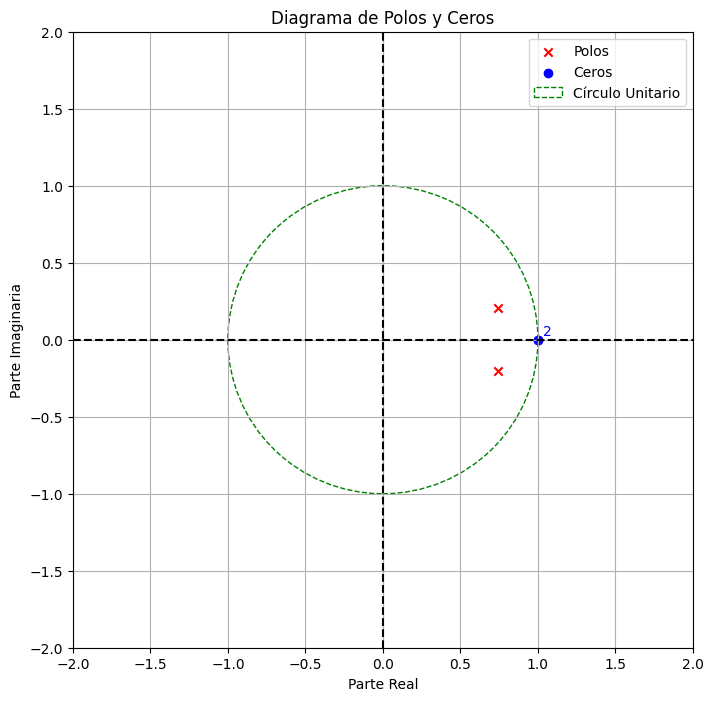

Polos:
[0.74070102+0.20472487j 0.74070102-0.20472487j]
Zeros:
[1. 1.]


C:\Users\User\AppData\Local\Temp\ipykernel_8184\3111526145.py:97: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(self.w, 20 * np.log10(self.mag))


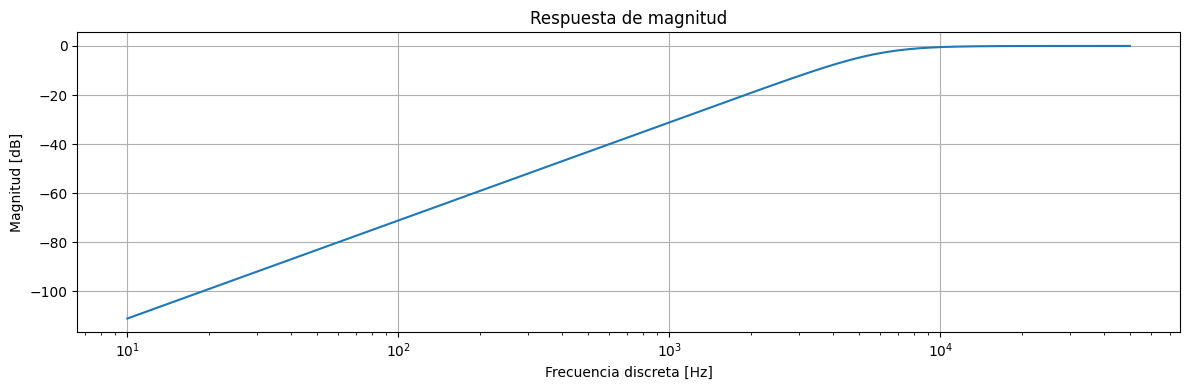

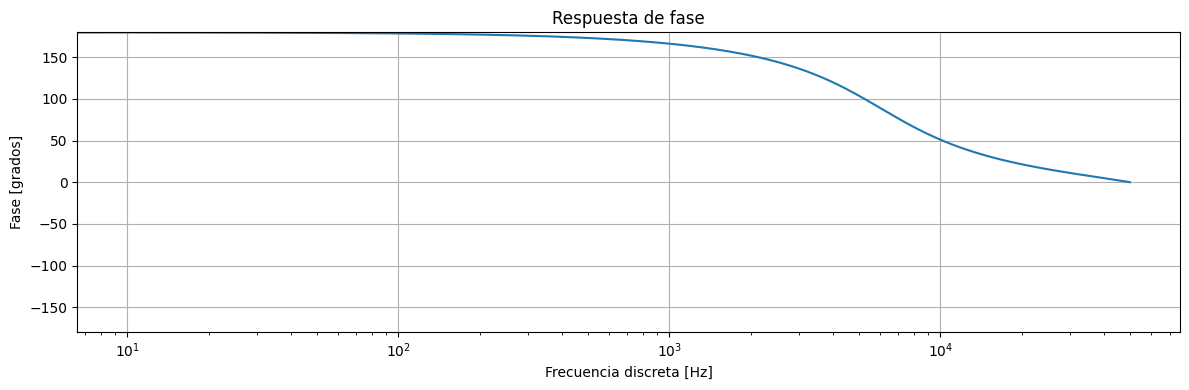

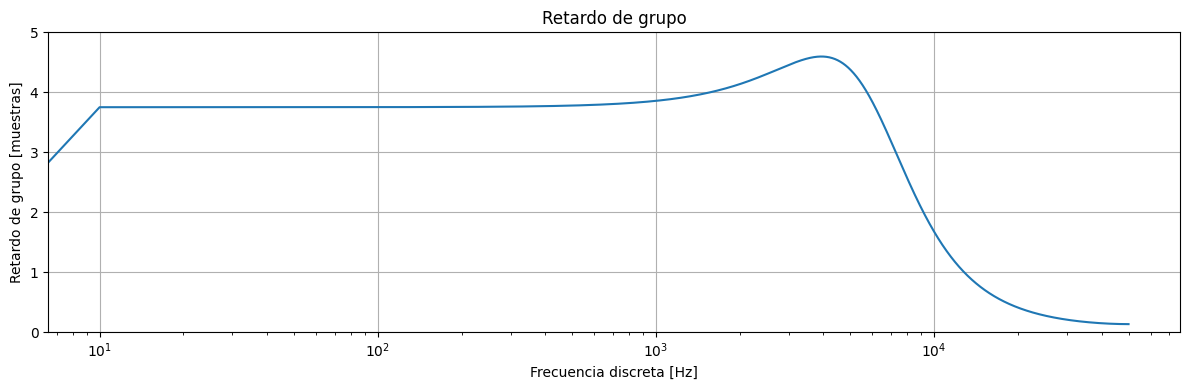

In [8]:
#Defino coeficientes
fs=100000
fc=6000
w0=np.pi*2*fc
k=2*fs

num = [1,0,0]
den = [1,np.sqrt(2)*w0,w0**2]

num,den = sig.bilinear(num,den,fs)

sysPA_fs100 = SysZ(num,den,fs=fs,N=5000)

#Plot PZMap
sysPA_fs100.printPZMap()

#Plot Module
sysPA_fs100.printModule()

#Plot Phase
sysPA_fs100.printPhase()

#Plot Group Delay
sysPA_fs100.printGroupDelay((0,5))

### Simulo Filtro Pasa-Altos con fs=10 kHz y fc=6 kHz

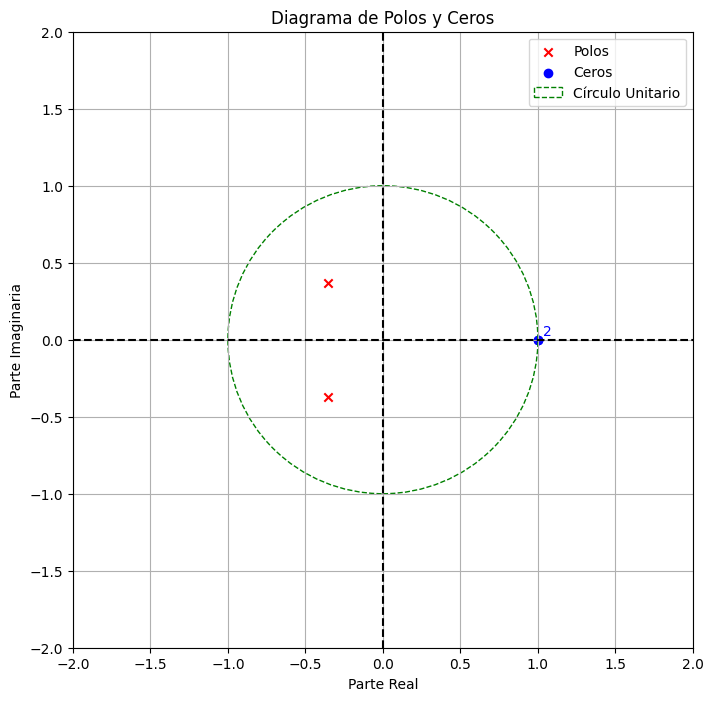

Polos:
[-0.35366848+0.36927667j -0.35366848-0.36927667j]
Zeros:
[1. 1.]


C:\Users\User\AppData\Local\Temp\ipykernel_8184\3111526145.py:97: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(self.w, 20 * np.log10(self.mag))


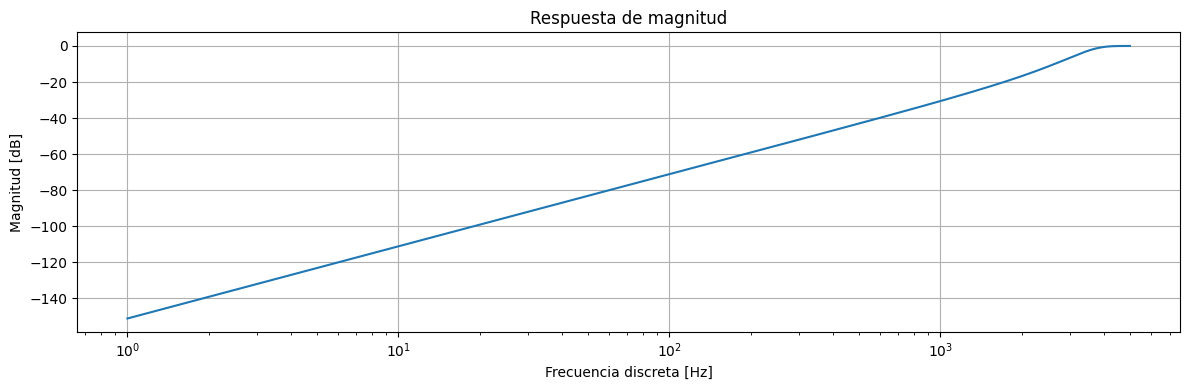

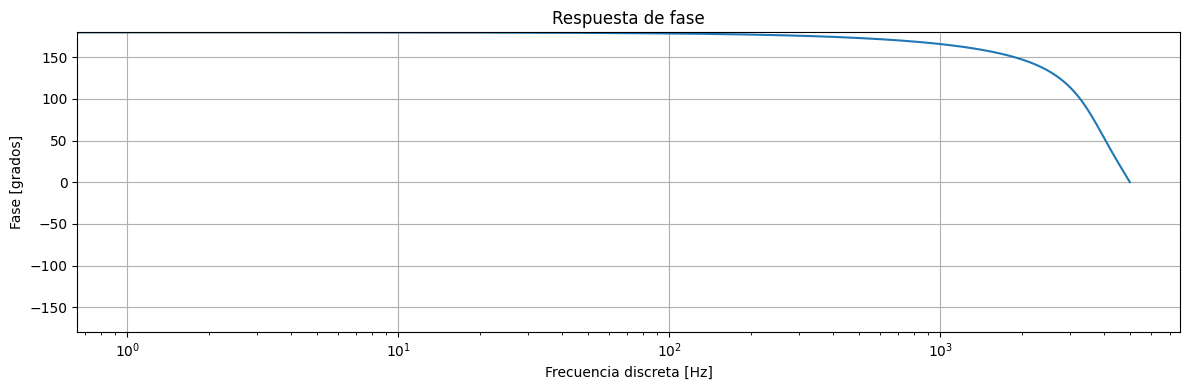

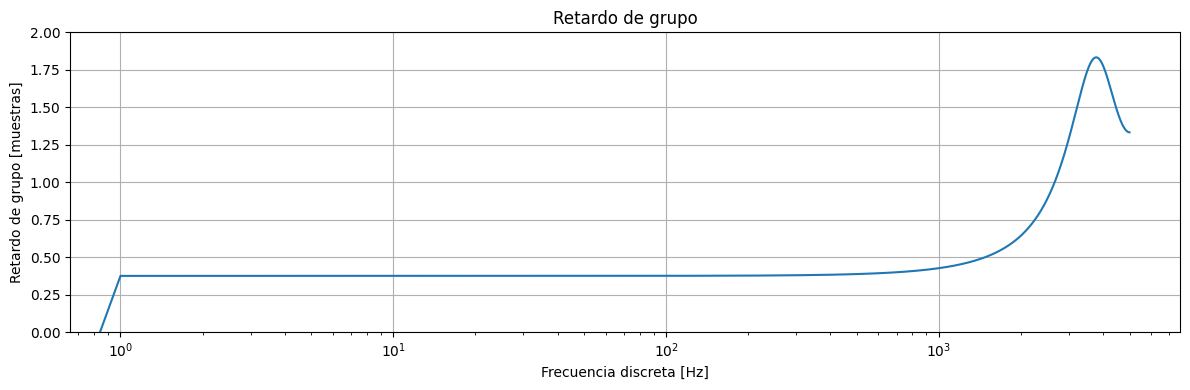

In [9]:
#Defino coeficientes
fs=10000
fc=6000
w0=np.pi*2*fc
k=2*fs

num = [1,0,0]
den = [1,np.sqrt(2)*w0,w0**2]

num,den = sig.bilinear(num,den,fs)

sysPA_fs10 = SysZ(num,den,fs=fs,N=5000)

#Plot PZMap
sysPA_fs10.printPZMap()

#Plot Module
sysPA_fs10.printModule()

#Plot Phase
sysPA_fs10.printPhase()

#Plot Group Delay
sysPA_fs10.printGroupDelay((0,2))

Filtro analógico


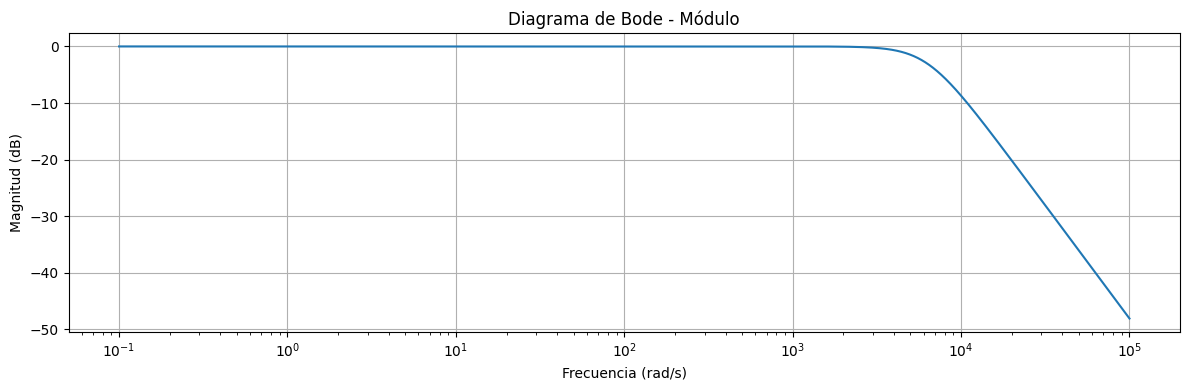

Filtro digital, FS=100k


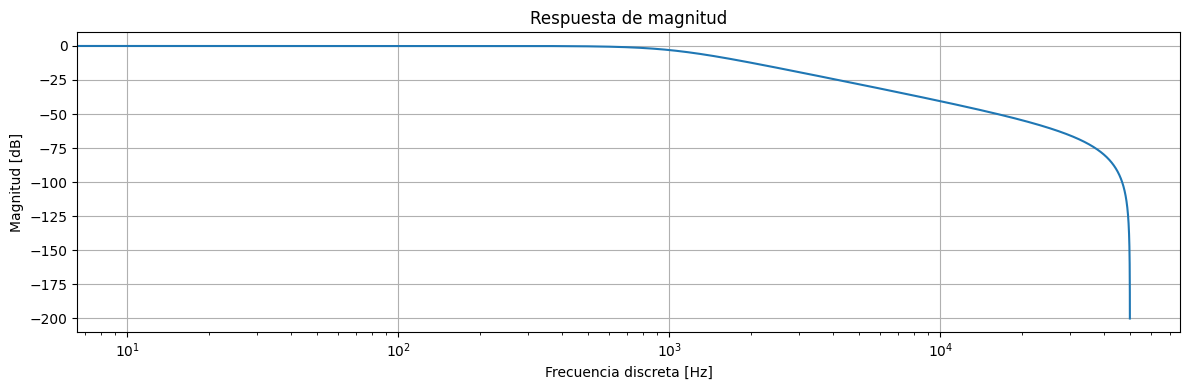

Filtro digital, FS=10k


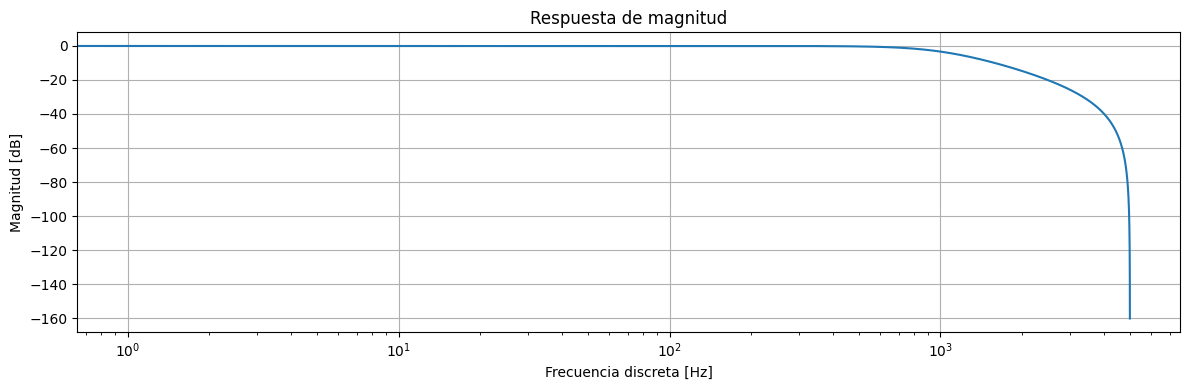

In [10]:
#Comparativa filtros pasa bajos
print("Filtro analógico")
pasaBajosAnalogico.printModule()

print("Filtro digital, FS=100k")
sysPB_fs100.printModule()

print("Filtro digital, FS=10k")
sysPB_fs10.printModule()

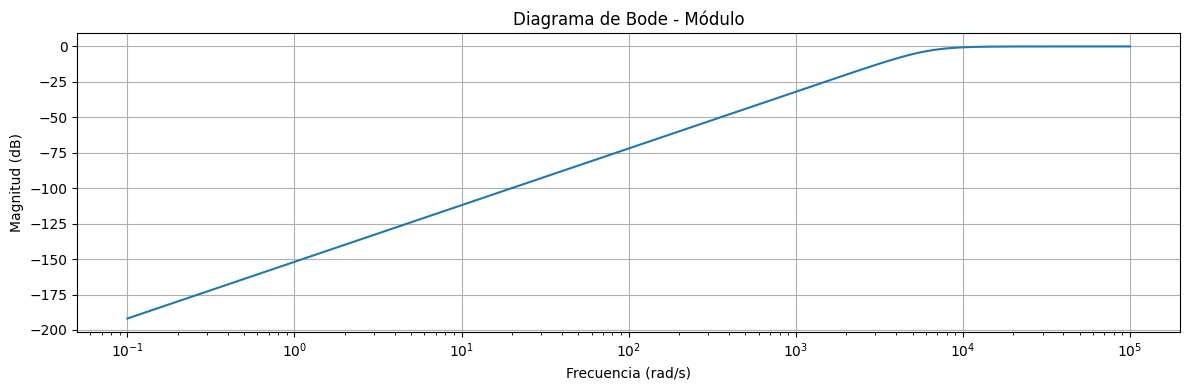

C:\Users\User\AppData\Local\Temp\ipykernel_8184\3111526145.py:97: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(self.w, 20 * np.log10(self.mag))


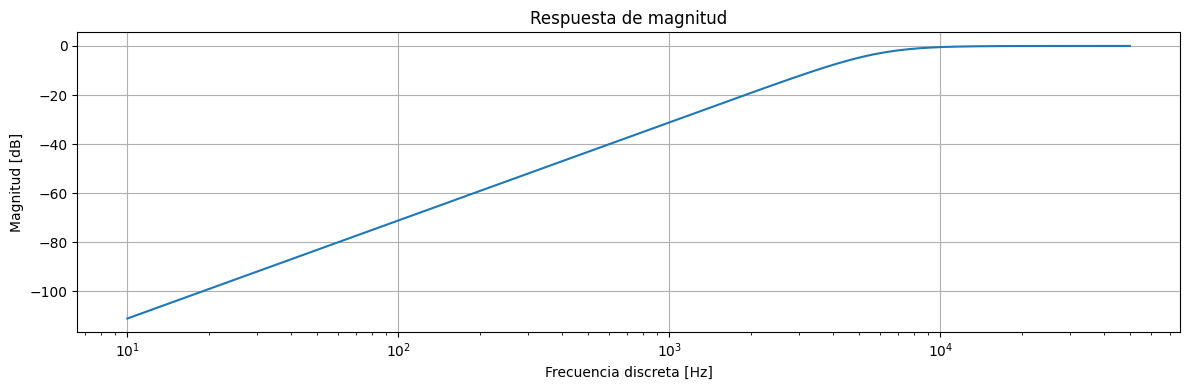

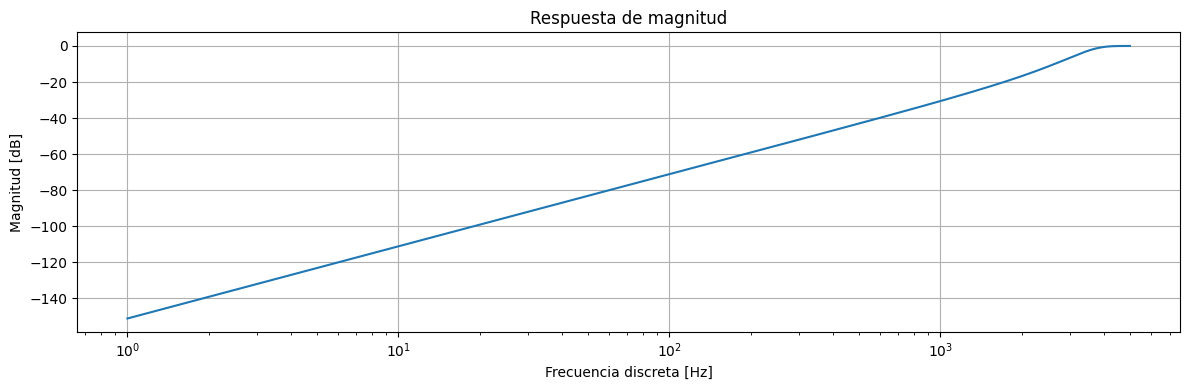

In [11]:
#Comparativa filtros pasa altos
pasaAltosAnalogico.printModule()
sysPA_fs100.printModule()
sysPA_fs10.printModule()

### Observaciones y conclusiones
En ambos casos, la respuesta del fitro analógico es un poco diferente a la que se mapea por las transformadas bilineales. Sin embargo, a medida que aumentemos la frecuencia de muestreo más precisos vamos a ser.

De todos modos, cualquiera sea el caso, siempre las altas frecuencias van a distorsionar más que las bajas. Es por ello que podemos aplicar el concepto de prewarping para corregir lo más posible en el rango de interés (de lo contrario la digitalización del filtro analógico no se comportará de la manera adecuada).

En nuestros sistemas el caso más crítico es para el filtro pasa-altos con fs=10kHz y fc=6kHz. En dicho sistema la fc está muy cerca de la fs. Es por ello que la banda de paso del filtro pasa altos se verá muy distorsionada. En este caso particular creo que sería ideal aplicar el concepto de prewarping.

Para el caso de los filtros pasa bajos, las altas frecuencias corresponden a la banda de stop, analizar esta banda puede ser o no crítico dependiendo el caso (por ejemplo si debemos cumplir con un alfa mínimo en dicho valores de F). En caso de serlo, también correspondería utilizar el prewarp más que nada para el caso de Fs=10kHz

### Análisis prewarping
#### Marco teórico
El prewarping es una solución que nace a partir de que cuando se hace una transformada bilineal, las frecuencias no se mapean linealmente del espectro analógico al espectro discreto.

Aspectos a recordar:

Dominio \$ -> transformada bilineal -> Dominio Z

Las bajas frecuencias en Z corresponden a las bajas frecuencias en $

Las altas frecuencias en Z corresponden a las altas frecuencias en $

Sin embargo, en las altas frecuencias se nota la alinealidad de la trasnformación.
Particularmente, se cumple que las bajas frecuencias se mapean aproximadamente lineales, pero las altas están más comprimidas, es decir, a medida que aumenta Z en las altas frecuencias, proporcionalemnte involucran a un rango mucho mayor en \$.

Otro aspecto a recordar:
- En \$: (0; Fs/2)
- Se proyecta en z como: (0; +pi)

Entonces si queremos analizar qué ocurre con las frecuencias cercanas a Nyquist, al hacer pequeñas variaciones en Z implicarán grandes variaciones en \$.

A fines conceptuales, con la técnica de prewarping podemos "elegir" qué parte del espectro de \$ se representa con "buena resolución" en Z.
Matemáticamente lo que hacemos con esta técnica es deformar intencionalmente la frecuencia de interés de tal manera que luego de pasar por la transformada bilineal termine quedando lo más lineal posible. Además, en la frecuencia de prewarping la frecuencia analógica y la digital coinciden (w= Ω*ws/2pi).

Cumpliendo con esta ecuación, vamos a tener una buena resolución en la frecuencia de prewarping:

\begin{equation}
f_{prewarping} = \cfrac{2 fs}{π} tan(π\cfrac{fprewarping}{fs})
\end{equation}

Esta técnica tiene sentido cuando queremos analizar frecuencias cercanas a la frecuencia de muestreo (o frecuencia de Nyquist)

# Ejercicio 2

Dadas las siguientes respuestas al impulso se pide:
- Transferencia del sistema 𝐻(𝑧)
- Singularidades en el plano 𝑧
- Respuesta de módulo y fase

a) Filtro de media móvil (moving average).

ℎ1(𝑘)=(1,1) significa ℎ(0)=1 y ℎ(1)=1

ℎ2(𝑘)=(1,1,1)

1. ¿Qué modificación debería implementarse para que la salida representa la media aritmética?
2. Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?

b) Filtro diferenciador

ℎ1(𝑘)=(1,− 1) de primer orden

ℎ2(k)=(1,0,-1) de segundo orden

1. ¿Qué demora introducen ambos sistemas?
2. Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a su respuesta ideal |𝐻(Ω)| = Ω.

### Filtro primediador 1

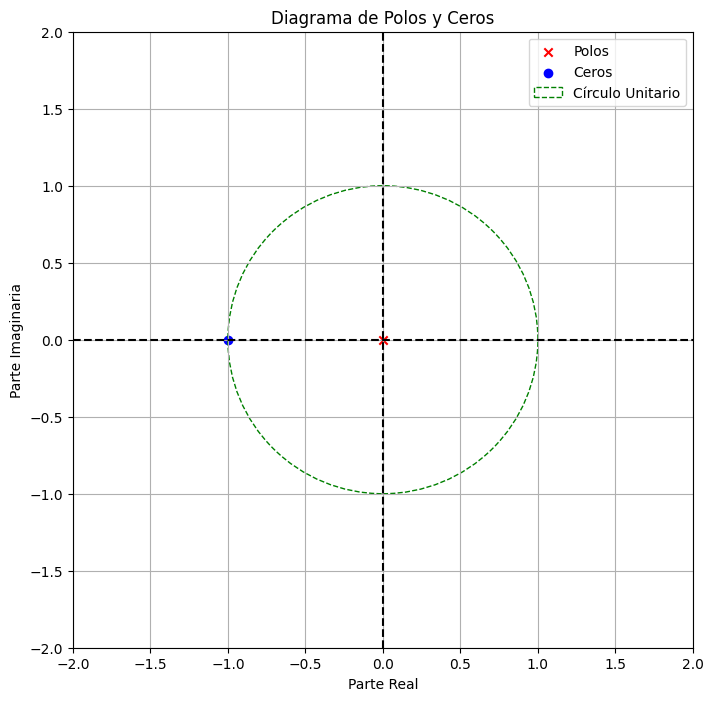

Polos:
[0.]
Zeros:
[-1.]


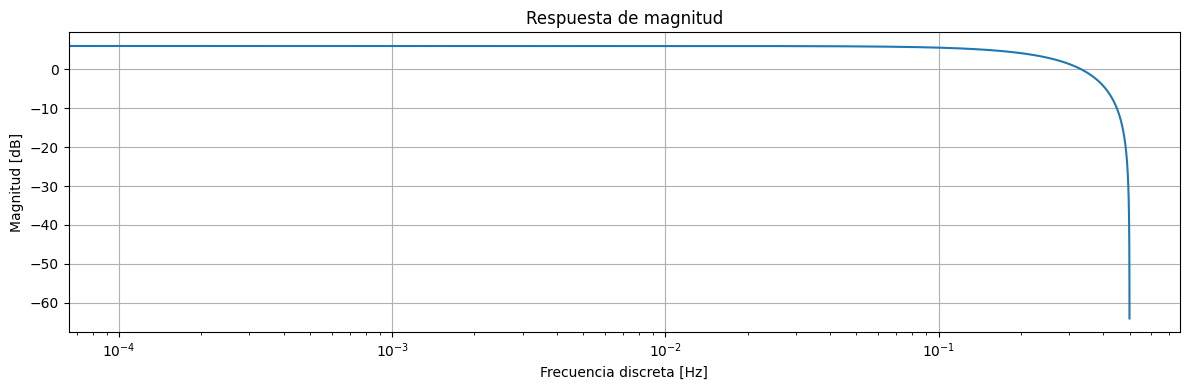

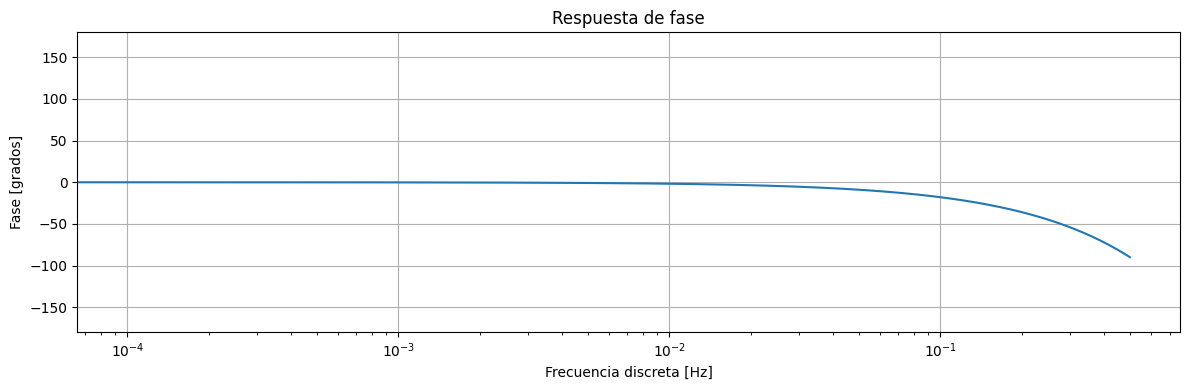

In [12]:
#Armo sistema 1
num = [1,1]
den = [1,0]
sysProm1 = SysZ(num, den, 1,N=5000)

#Plot PZMap
sysProm1.printPZMap()

#Plot modulo
sysProm1.printModule()

#Plot fase
sysProm1.printPhase()

### Filtro primediador 2

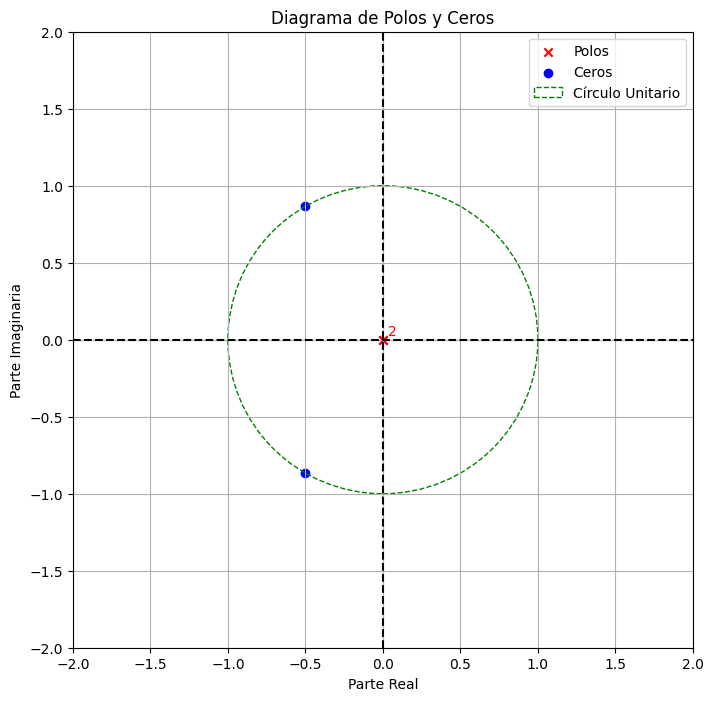

Polos:
[0. 0.]
Zeros:
[-0.5+0.8660254j -0.5-0.8660254j]


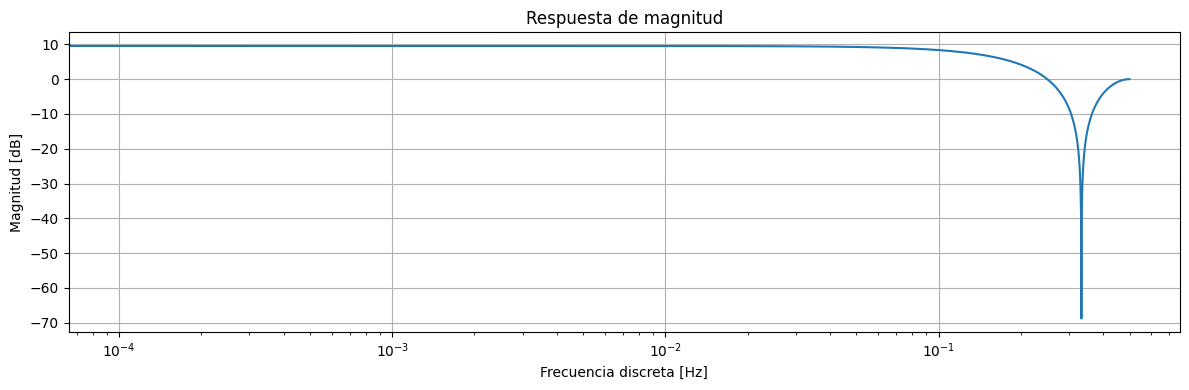

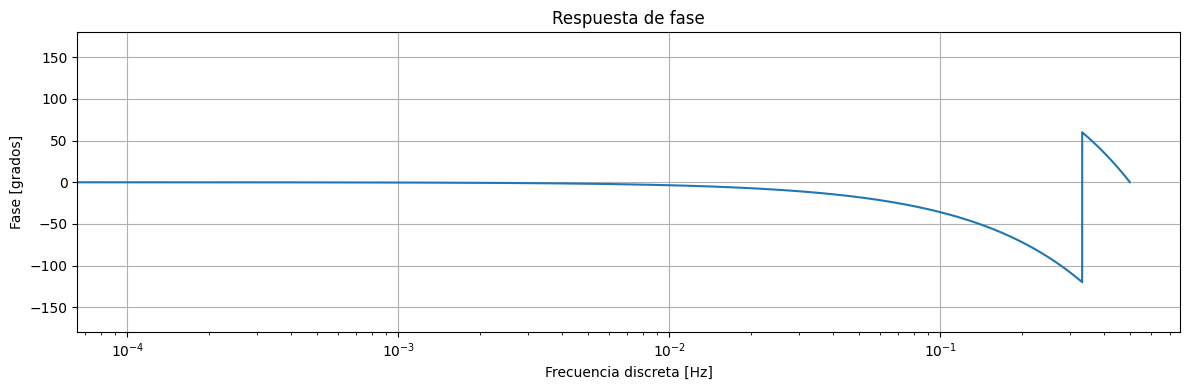

In [13]:
#Armo sistema 2
num = [1,1,1]
den = [1,0,0]
sysProm2 = SysZ(num, den, 1,N=5000)

#Plot PZMap
sysProm2.printPZMap()

#Plot modulo
sysProm2.printModule()

#Plot modulo
sysProm2.printPhase()

### Preguntas Teóricas Promediador

**1. ¿Qué modificación debería implementarse para que la salida representa la media aritmética?**

Para este tipo de sistemas donde todos los coeficientes son iguales se cumple que:

\begin{equation}
y(k)=\sum_{i=0}^{N-1}x(k-i)b_i
\end{equation}
Donde:

N: cantidad de muestras totales

Por lo tanto si cada bi=1/N podemos sacarlo factor común y termina quedando exacamente la media aritmética:
\begin{equation}
y(k)=(1/N)\sum_{i=0}^{N-1}x(k-i)
\end{equation}

Es decir, deberíamos implementar filtros así:

h1=(1/2, 1/2)

h2=(1/3, 1/3, 1/3)

**2. Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?**

Analizando el diagrama de polos y ceros, podemos ver que los ceros se encuentran en:
\begin{equation}
z = 1 ∠ ±(2/3π)rad
\end{equation}

Por otro lado, sabemos que fs/2 se encuentra en π rad

π rad ------------ fs/2

2π/3 rad --------- F=50Hz

\begin{equation}
Fs/2 = π \cfrac{50 Hz}{2π/3}
\end{equation}

\begin{equation}
Fs = 2 \cfrac{50 Hz}{2/3} = 150 Hz
\end{equation}

### Filtro diferenciador 1

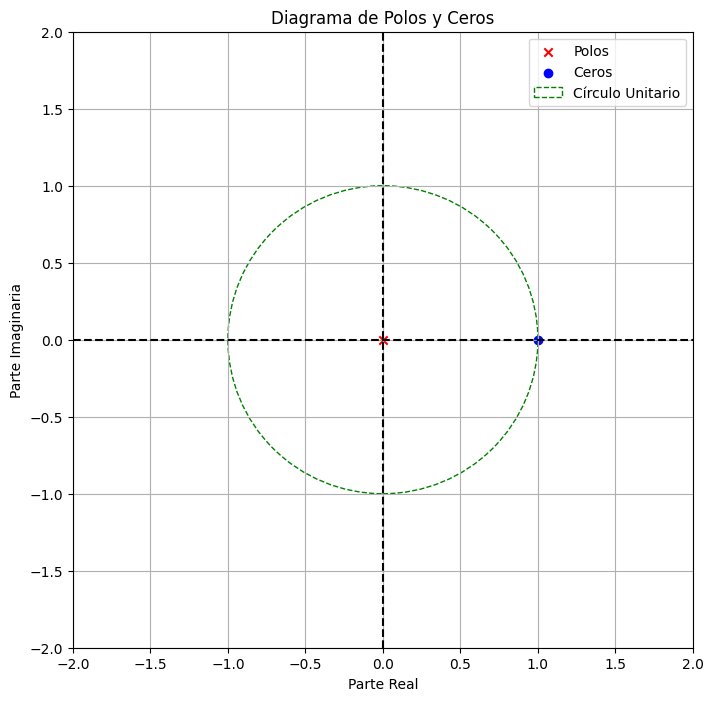

Polos:
[0.]
Zeros:
[1.]


C:\Users\User\AppData\Local\Temp\ipykernel_8184\3111526145.py:97: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(self.w, 20 * np.log10(self.mag))


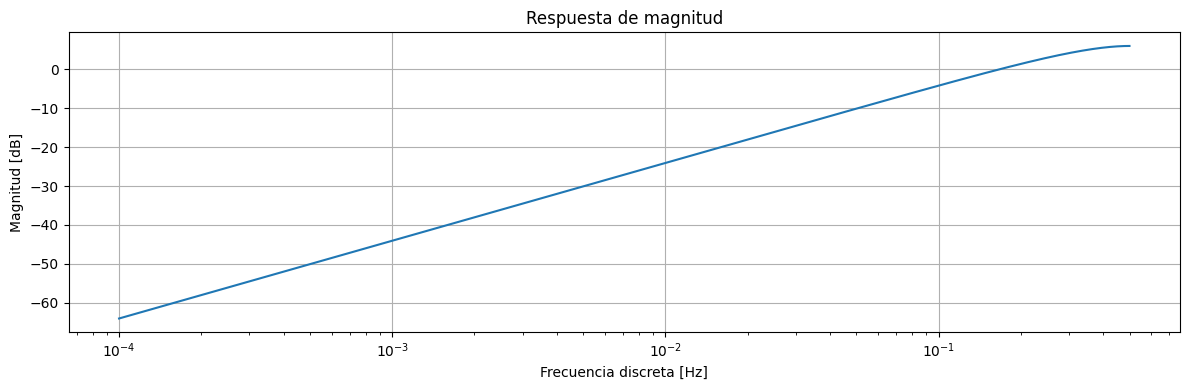

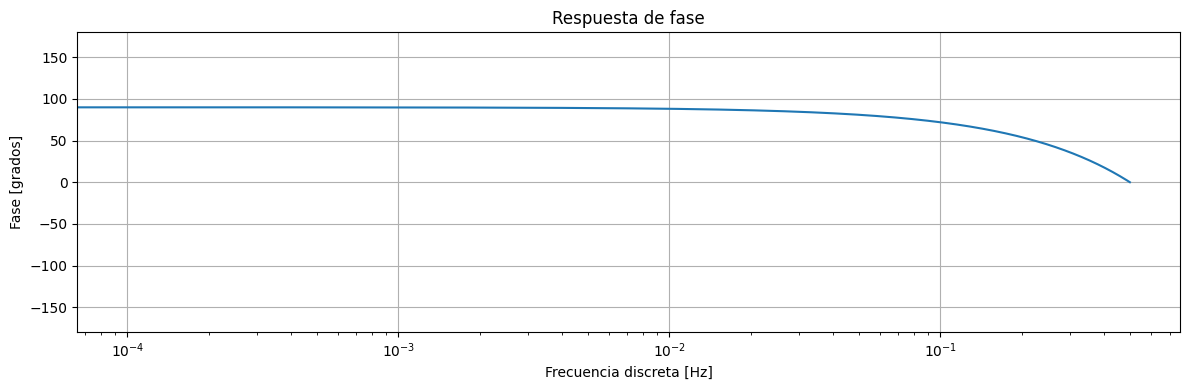

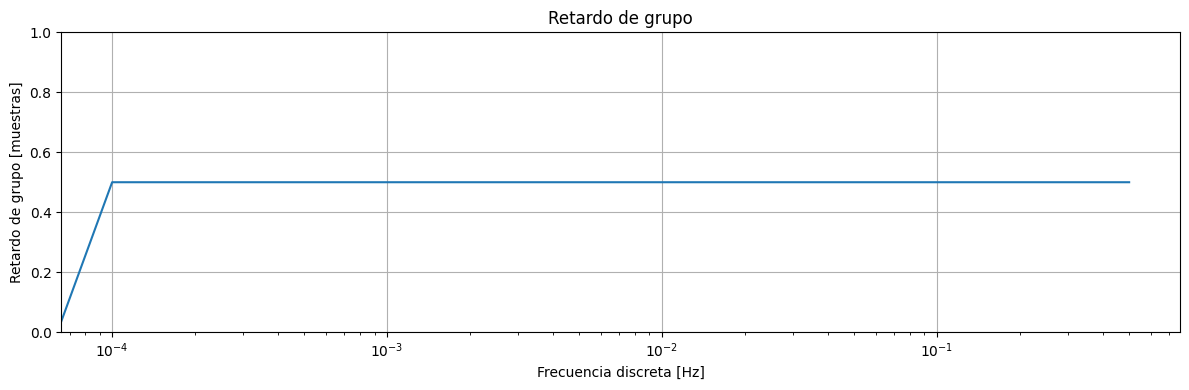

In [14]:
#Formo diferenciador 1
num=[1,-1]
den=[1,0]
sysDif1 = SysZ(num,den,1,N=5000)

#Plot PZMap
sysDif1.printPZMap()

#Plot modulo
sysDif1.printModule()

#Plot fase
sysDif1.printPhase()

#Plot Retardo
sysDif1.printGroupDelay((0,1))

### Filtro diferenciador 2

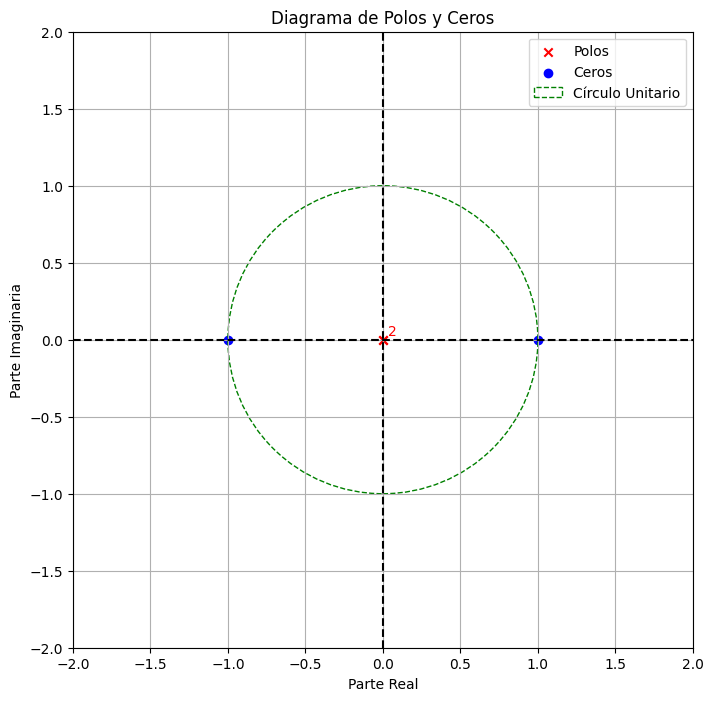

Polos:
[0. 0.]
Zeros:
[-1.  1.]


C:\Users\User\AppData\Local\Temp\ipykernel_8184\3111526145.py:97: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(self.w, 20 * np.log10(self.mag))


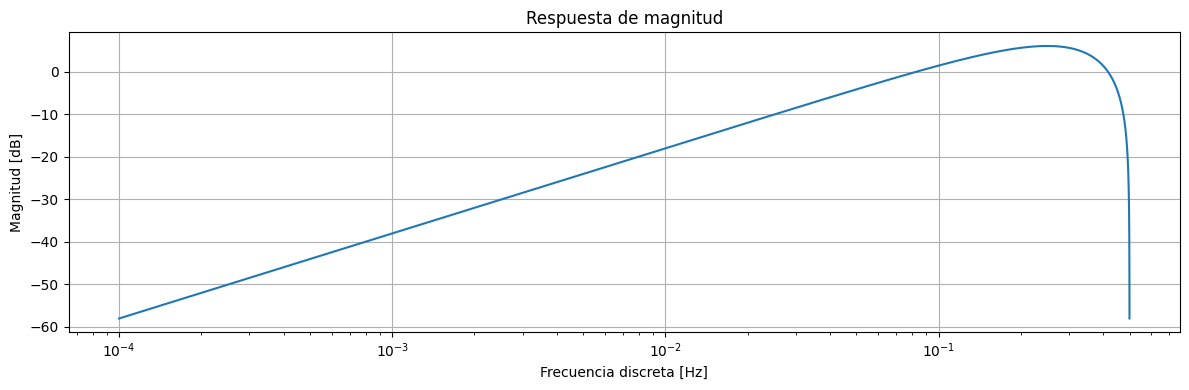

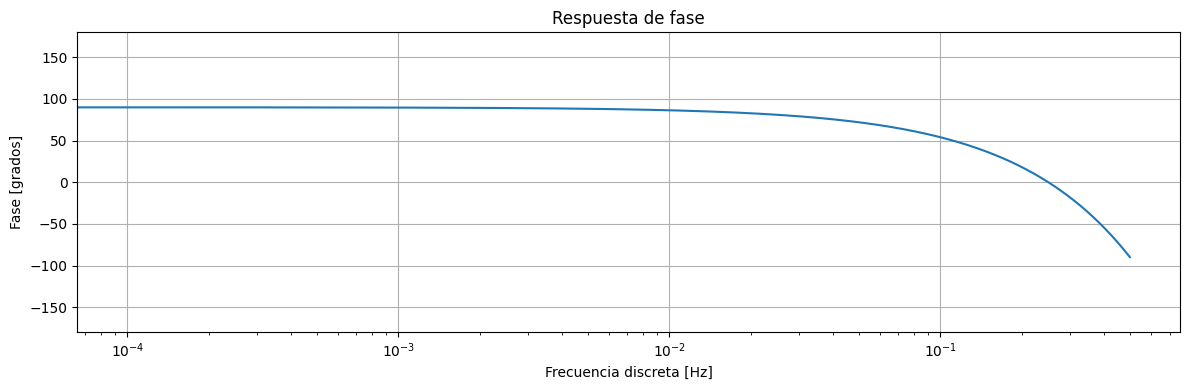

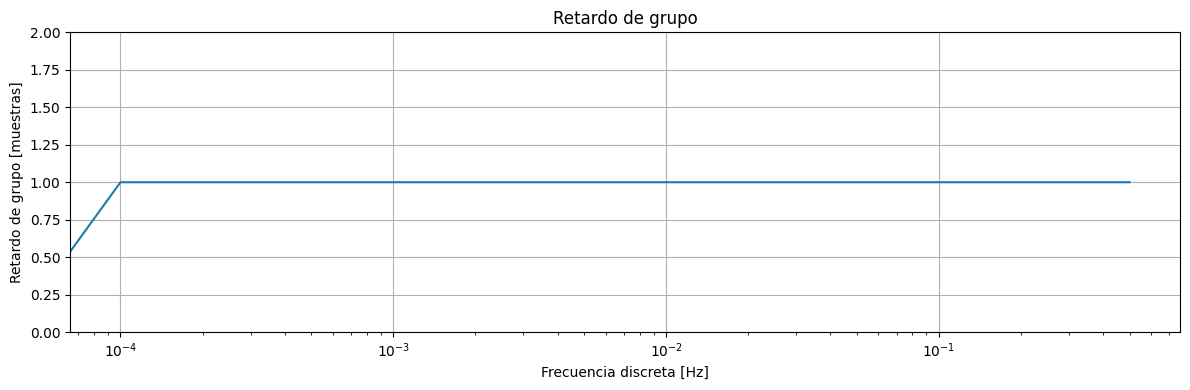

In [15]:
#Formo diferenciador 1
num=[1,0,-1]
den=[1,0,0]
sysDif2 = SysZ(num,den,1,N=5000)

#Plot PZMap
sysDif2.printPZMap()

#Plot modulo
sysDif2.printModule()

#Plot fase
sysDif2.printPhase()

#Plot retardo
sysDif2.printGroupDelay((0,2))

### Preguntas Teóricas Diferenciador  

**1. ¿Qué demora introducen ambos sistemas?**

Ambos sistemas introducen un retardo que es constante. Esto es una gran ventaja.
Sin embargo, siempre conviene tener un retardo entero dado que si tenemos un retardo fraccionario, el sistema pierde determinismo. Ya que no puede haber un retardo fraccionario de muestras.
En este caso el segundo sistema parece ser más útil en la práctica.

**2. Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a su respuesta ideal |𝐻(Ω)| = Ω.**

En nuestro caso solo debemos analizar para valores de -pi a pi y se tiene que cumplir que:

| |H(z)|real - |H(z)|ideal | < 0.05 |H(z)|real

| |H(z)|real - |H(z)|ideal | / |H(z)|real < 0.05 

**Analizo sistema 1:**
<img src="dif1.jpg">
<img src="Ejer2b-1.png">
<img src="Ejer2b-2.png">

**Analizo sistema 2:**
<img src="dif2.jpg">
<img src="Ejer2b-3.png">
<img src="Ejer2b-4.png">

# Ejercicio 3

Se dispone del siguiente filtro digital:

<img src="consigna.png">

a) Para la transferencia del filtro con M = 2 y α=0.8; calcular:

1) Diagrama de polos y ceros

2) Respuesta en módulo

3) Respuesta en Fase

4) Retardo de grupo.

b) Si quisiéramos anular una senoidal interferente de 125 Hz y su segunda armónica, y sólo dispone de un sumador y el filtro de la figura con M = 4. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.

<img src="ejer3a.jpg">

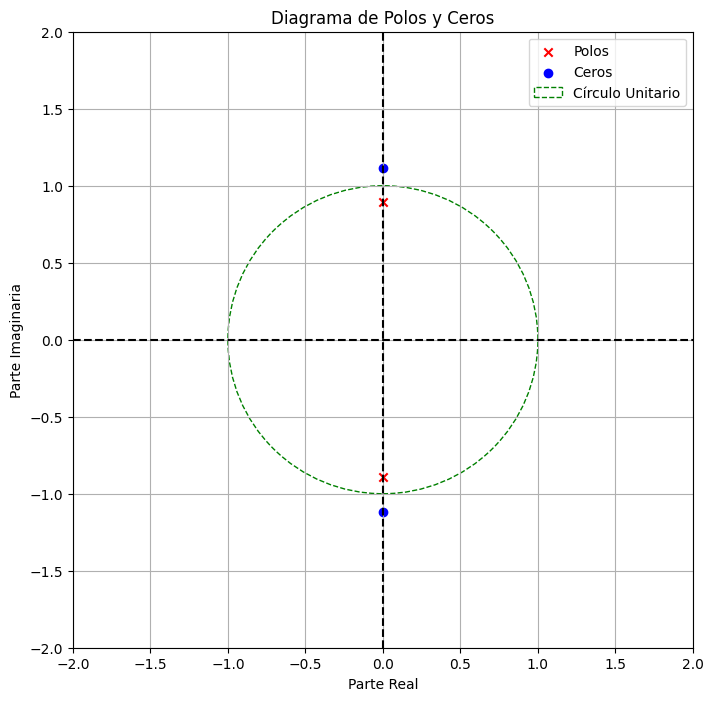

Polos:
[-0.+0.89442719j  0.-0.89442719j]
Zeros:
[-0.+1.11803399j  0.-1.11803399j]


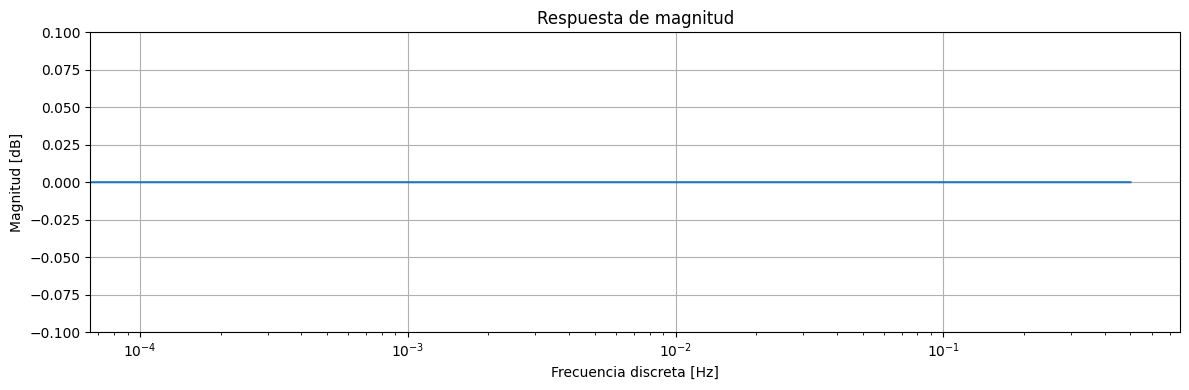

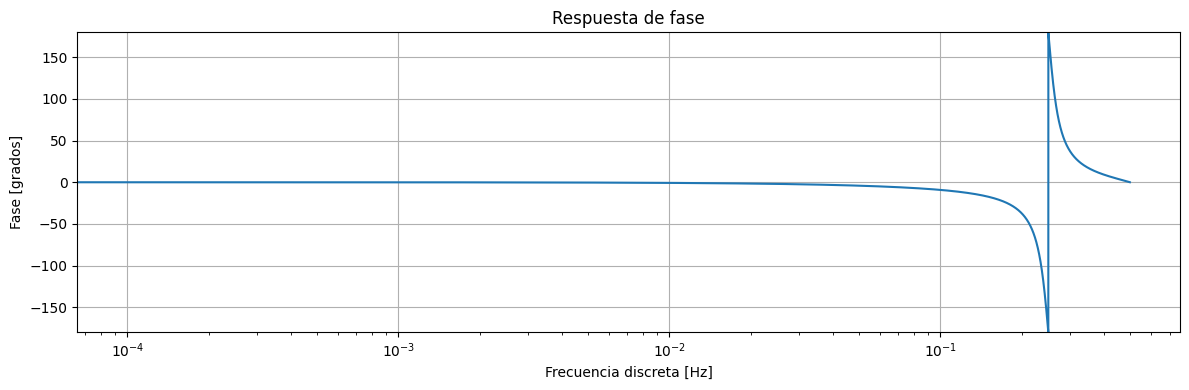

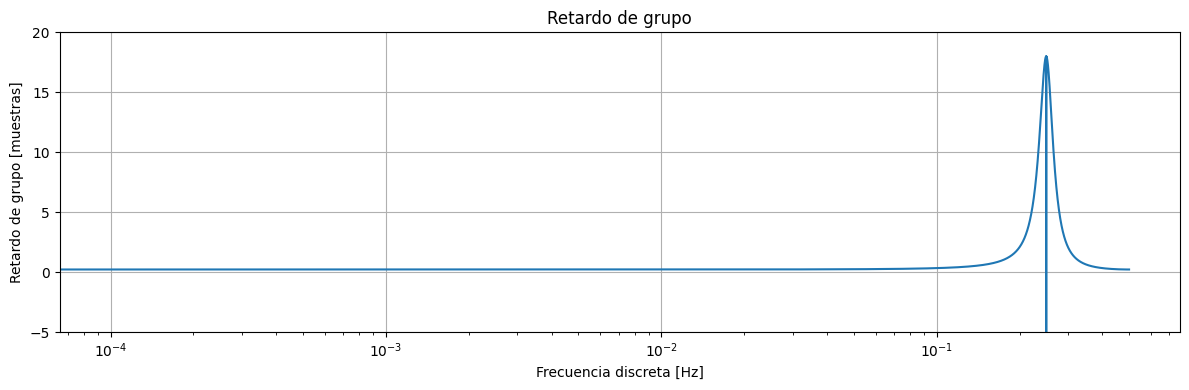

In [16]:
#Formo sistema
num=[0.8,  0.0,  1.0]
den=[1.0,  0.0,  0.8]
sys3 = SysZ(num,den,1,N=5000)

#Plot PZMap
sys3.printPZMap()

#Plot modulo
sys3.printModule((-0.1,0.1))

#Plot fase
sys3.printPhase()

#Plot retardo
sys3.printGroupDelay((-5,20))

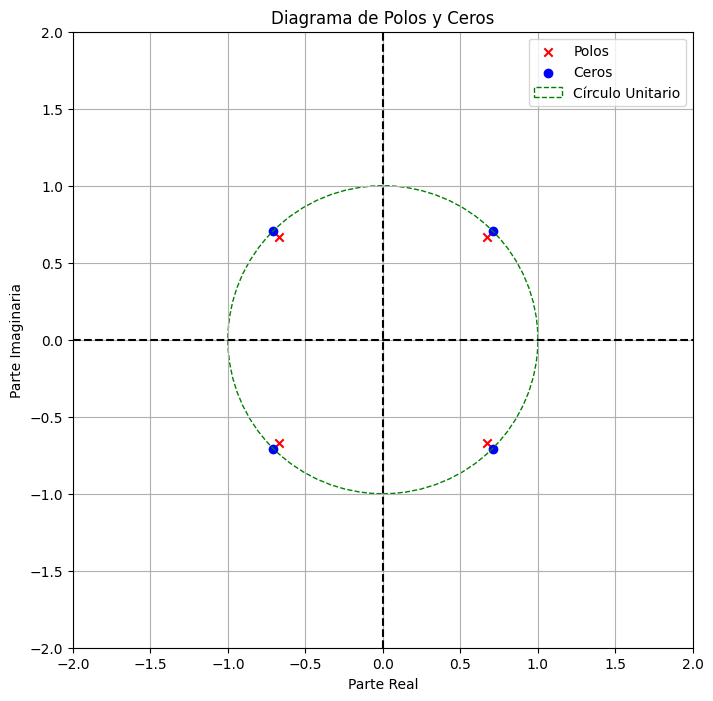

Polos:
[-0.6687403+0.6687403j -0.6687403-0.6687403j  0.6687403+0.6687403j
  0.6687403-0.6687403j]
Zeros:
[-0.70710678+0.70710678j -0.70710678-0.70710678j  0.70710678+0.70710678j
  0.70710678-0.70710678j]


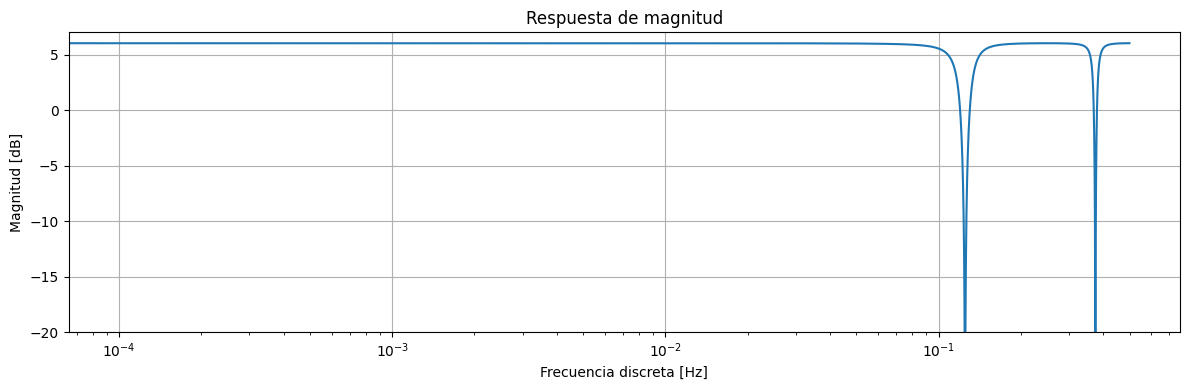

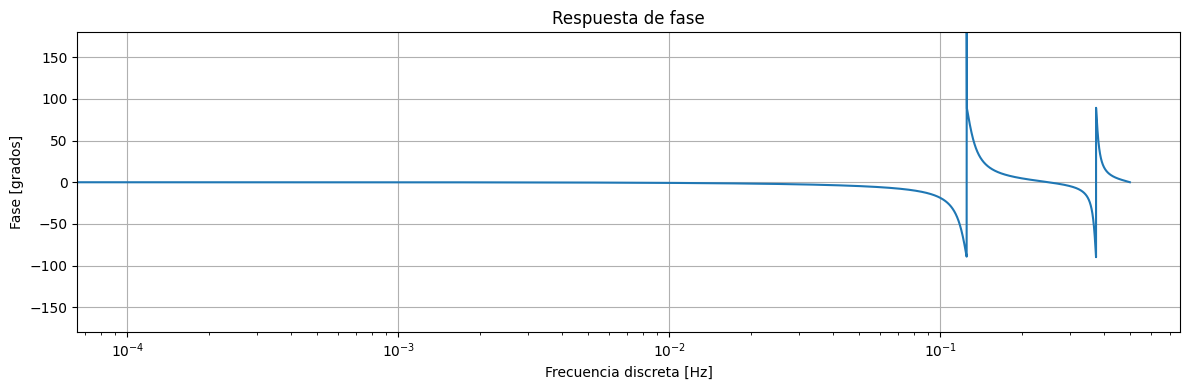

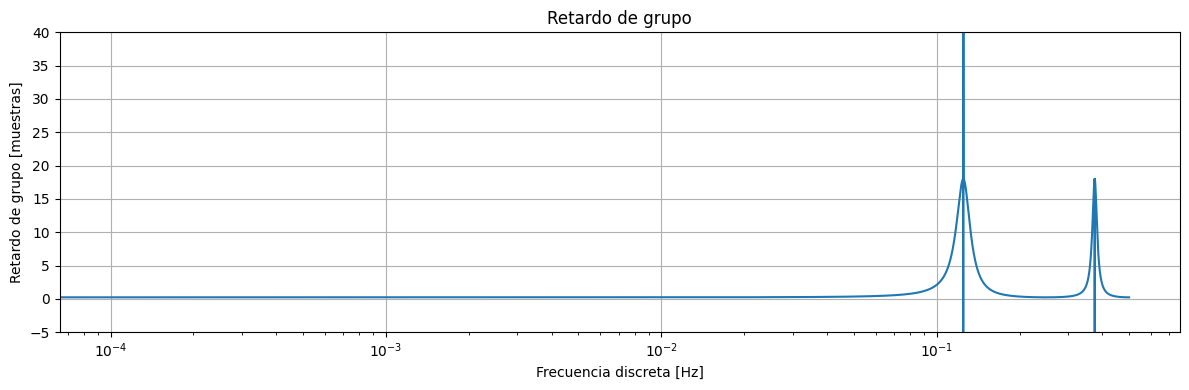

In [17]:
# Ejercicio b
#Formo sistema
num=[1.8,  0.0,  0.0,  0.0,  1.8]
den=[1.0,  0.0,  0.0,  0.0,  0.8]
sys3 = SysZ(num,den,1,N=5000)

#Plot PZMap
sys3.printPZMap()

#Plot modulo
sys3.printModule((-20,7))

#Plot fase
sys3.printPhase()

#Plot retardo
sys3.printGroupDelay((-5,40))

<img src="ejer3b.jpg">